In [14]:
import re
import matplotlib.pyplot as plt

In [21]:
# File paths
# rtt_log_file = "../data/video/cubic_rtt.log"
# ss_metrics_log_file = "../data/video/cubic_ss_metrics.log"
rtt_log_file = "../data/video/bbr_rtt.log"
ss_metrics_log_file = "../data/video/bbr_ss_metrics.log"

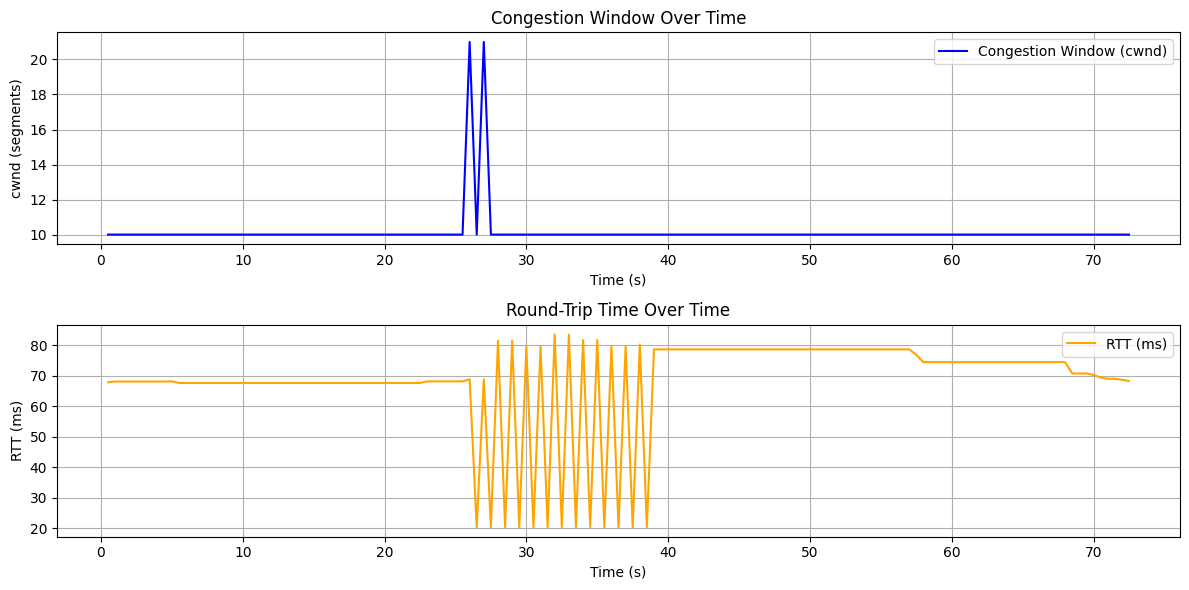

In [20]:
# Parse SS metrics
def parse_ss_metrics(file_path):
    metrics = {"cwnd": [], "rtt": [], "time": []}
    time_counter = 0.5  # Assuming 'watch' was run at 0.5s intervals
    with open(file_path, 'r') as file:
        for line in file:
            if "cwnd:" in line:
                # Extract metrics
                cwnd_match = re.search(r"cwnd:(\d+)", line)
                rtt_match = re.search(r"rtt:(\d+\.\d+)/", line)
                
                if cwnd_match and rtt_match:
                    metrics["cwnd"].append(int(cwnd_match.group(1)))
                    metrics["rtt"].append(float(rtt_match.group(1)))
                    metrics["time"].append(time_counter)
                    time_counter += 0.5
    return metrics

# Plot cwnd and rtt
def plot_metrics(metrics):
    # Plot Congestion Window (cwnd)
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(metrics["time"], metrics["cwnd"], label="Congestion Window (cwnd)", color='blue')
    plt.xlabel("Time (s)")
    plt.ylabel("cwnd (segments)")
    plt.title("Congestion Window Over Time")
    plt.legend()
    plt.grid()

    # Plot Round-Trip Time (RTT)
    plt.subplot(2, 1, 2)
    plt.plot(metrics["time"], metrics["rtt"], label="RTT (ms)", color='orange')
    plt.xlabel("Time (s)")
    plt.ylabel("RTT (ms)")
    plt.title("Round-Trip Time Over Time")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


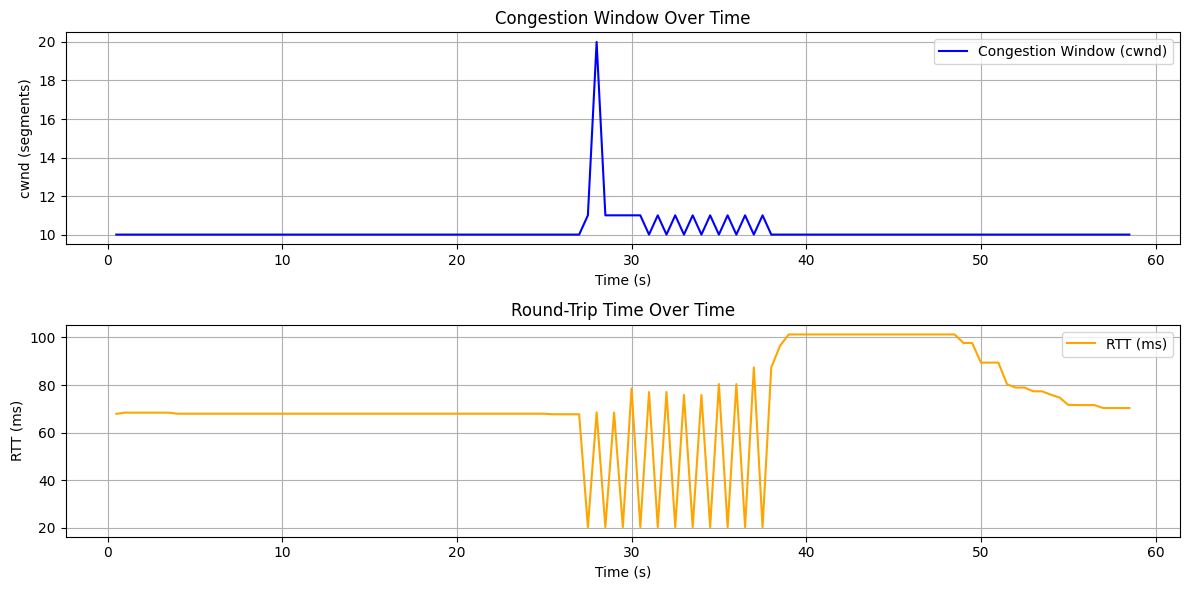

In [22]:
# Replace with your file path
file_path = ss_metrics_log_file
metrics = parse_ss_metrics(file_path)
plot_metrics(metrics)